In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Box plot for a single numerical feature
sns.boxplot(x=df['Feature3'])  # Replace 'Feature3' with any numeric column
plt.title('Box Plot of Feature3')
plt.show()


Accuracy: 0.783

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       217
           1       0.78      1.00      0.88       783

    accuracy                           0.78      1000
   macro avg       0.39      0.50      0.44      1000
weighted avg       0.61      0.78      0.69      1000


Confusion Matrix:
 [[  0 217]
 [  0 783]]


C:\Users\vikas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vikas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vikas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


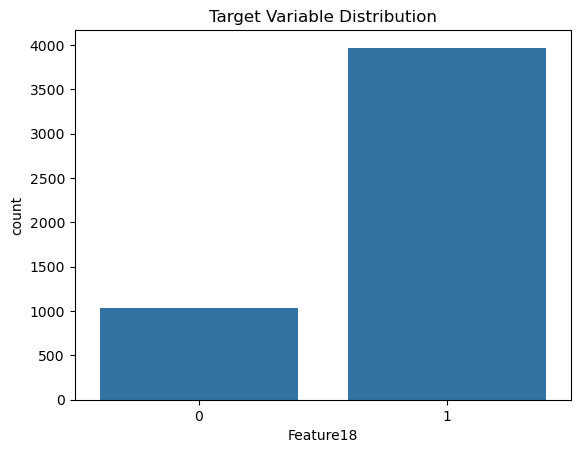

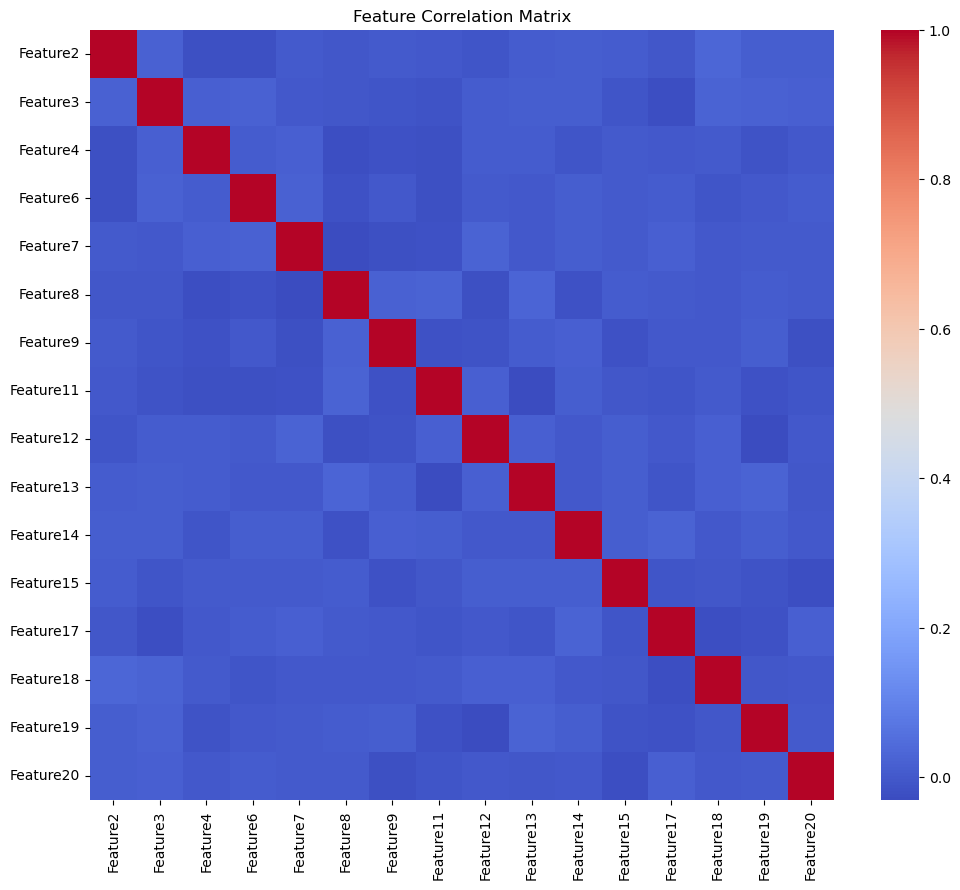

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv(r"C:\Users\vikas\OneDrive\Documents\output(1).csv")

# ------------------------------
# Data Cleaning & Preprocessing
# ------------------------------
# Drop columns with too many missing values (> 40%)
threshold = 0.4
df = df[df.columns[df.isnull().mean() < threshold]]

# Impute numerical features with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='median')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

# Impute categorical features with most frequent
cat_cols = df.select_dtypes(include='object').columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

# Encode categorical features
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# -------------------
# Feature Engineering
# -------------------
# Define features and target
X = df.drop("Feature18", axis=1)
y = df["Feature18"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------------------------
# Train/Test Split & Model
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ----------------
# Model Evaluation
# ----------------
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -------------------------
# Basic EDA Visualization
# -------------------------
sns.countplot(x="Feature18", data=df)
plt.title("Target Variable Distribution")
plt.show()

corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Matrix")
plt.show()


In [7]:
df.head()

,Feature2,Feature3,Feature4,Feature6,Feature7,Feature8,Feature9,Feature11,Feature12,Feature13,Feature14,Feature15,Feature17,Feature18,Feature19,Feature20
0,0.797417,-0.958091,1,158.0000,1.490148,5.166124,2.277942,5.0,0,1.0,0,3,11.711130,1,1,0
1,0.026838,-0.244178,3,507.6797,2.151535,0.450312,-3.395356,3.0,0,0.0,0,1,13.355832,1,1,0
2,0.199990,-1.014799,1,474.0000,1.410613,6.786555,-3.070746,7.0,2,0.0,0,1,13.449484,1,2,1
3,0.474124,0.448040,1,166.0000,0.635091,1.937158,-0.246269,20.0,0,0.0,0,1,7.687652,1,1,0
4,0.598516,0.087839,1,507.6797,0.392104,4.010937,3.215086,3.0,2,0.0,0,2,6.807770,1,1,0


In [9]:
df.tail()

,Feature2,Feature3,Feature4,Feature6,Feature7,Feature8,Feature9,Feature11,Feature12,Feature13,Feature14,Feature15,Feature17,Feature18,Feature19,Feature20
4995,0.819440,0.415931,2,507.6797,1.765590,1.929735,-1.951884,1.0,2,1.0,1,3,14.821501,0,1,0
4996,0.032140,-1.445420,2,507.6797,0.806246,8.765315,-1.866815,1.0,1,0.0,2,3,5.308922,1,2,0
4997,0.263300,0.986722,2,78.0000,1.326853,4.489722,1.720671,1.0,0,0.0,0,3,9.508951,1,2,0
4998,0.640986,-1.199847,0,51.0000,0.312256,2.773963,-3.320704,2.0,0,0.0,0,2,8.705127,0,2,2
4999,0.901570,1.836382,1,507.6797,2.087461,6.854886,-0.259228,6.0,0,0.0,1,1,14.686372,1,0,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature2   5000 non-null   float64
 1   Feature3   5000 non-null   float64
 2   Feature4   5000 non-null   int32  
 3   Feature6   5000 non-null   float64
 4   Feature7   5000 non-null   float64
 5   Feature8   5000 non-null   float64
 6   Feature9   5000 non-null   float64
 7   Feature11  5000 non-null   float64
 8   Feature12  5000 non-null   int32  
 9   Feature13  5000 non-null   float64
 10  Feature14  5000 non-null   int32  
 11  Feature15  5000 non-null   int32  
 12  Feature17  5000 non-null   float64
 13  Feature18  5000 non-null   int32  
 14  Feature19  5000 non-null   int32  
 15  Feature20  5000 non-null   int32  
dtypes: float64(9), int32(7)
memory usage: 488.4 KB


In [13]:
df.describe()

,Feature2,Feature3,Feature4,Feature6,Feature7,Feature8,Feature9,Feature11,Feature12,Feature13,Feature14,Feature15,Feature17,Feature18,Feature19,Feature20
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,0.509843,-0.009058,1.291400,507.090764,0.993603,3.983471,-0.024540,4.967800,0.917600,0.496000,0.413200,1.498400,9.996307,0.793600,0.85440,0.458800
std,0.322480,1.010739,0.911182,272.732462,0.991321,2.784779,1.829975,4.571624,0.832916,0.674444,0.673615,1.112045,2.893759,0.404761,0.83243,0.715266
min,-0.476438,-3.644316,0.000000,-538.762910,0.000775,0.033463,-8.516517,1.000000,0.000000,0.000000,0.000000,0.000000,5.000292,0.000000,0.00000,0.000000
25%,0.253741,-0.686737,1.000000,418.000000,0.286745,1.925878,-1.124829,2.000000,0.000000,0.000000,0.000000,1.000000,7.509306,1.000000,0.00000,0.000000
50%,0.513507,-0.017156,1.000000,507.679700,0.702917,3.360472,0.008667,4.000000,1.000000,0.000000,0.000000,1.000000,10.026013,1.000000,1.00000,0.000000
75%,0.770195,0.688604,2.000000,610.000000,1.376030,5.314882,1.107796,7.000000,2.000000,1.000000,1.000000,2.000000,12.485023,1.000000,2.00000,1.000000
max,1.497998,3.422062,3.000000,1543.622087,8.843108,22.813462,9.915071,46.000000,2.000000,2.000000,2.000000,3.000000,14.999633,1.000000,2.00000,2.000000


In [15]:
df.duplicated().sum()

0

In [17]:
df.shape

(5000, 16)

In [19]:
df.dtypes

Feature2     float64
Feature3     float64
Feature4       int32
Feature6     float64
Feature7     float64
Feature8     float64
Feature9     float64
Feature11    float64
Feature12      int32
Feature13    float64
Feature14      int32
Feature15      int32
Feature17    float64
Feature18      int32
Feature19      int32
Feature20      int32
dtype: object

In [21]:
df.columns

Index(['Feature2', 'Feature3', 'Feature4', 'Feature6', 'Feature7', 'Feature8',
       'Feature9', 'Feature11', 'Feature12', 'Feature13', 'Feature14',
       'Feature15', 'Feature17', 'Feature18', 'Feature19', 'Feature20'],
      dtype='object')

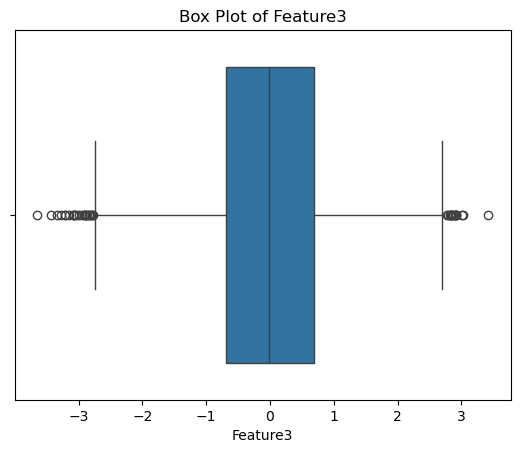

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Box plot for a single numerical feature
sns.boxplot(x=df['Feature3'])  # Replace 'Feature3' with any numeric column
plt.title('Box Plot of Feature3')
plt.show()


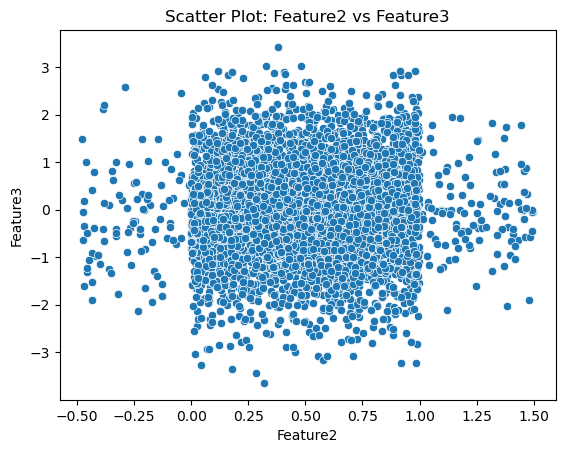

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'Feature2' and 'Feature3' with actual numeric column names
sns.scatterplot(data=df, x='Feature2', y='Feature3')
plt.title('Scatter Plot: Feature2 vs Feature3')
plt.show()
